<a href="https://colab.research.google.com/github/rahul-bellam/nlp-lab/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the 'seaborn-v0_8-darkgrid' style
plt.style.use('seaborn-v0_8-darkgrid')

df = pd.read_csv('/content/all-data.csv', encoding="ISO-8859-1")
print(df.head())

  Sentiment                                      News Headline  Unnamed: 2  \
0   neutral  According to Gran , the company has no plans t...         NaN   
1   neutral  Technopolis plans to develop in stages an area...         NaN   
2  negative  The international electronic industry company ...         NaN   
3  positive  With the new production plant the company woul...         NaN   
4  positive  According to the company 's updated strategy f...         NaN   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0         NaN

In [27]:
df.isnull().any()

,0
Sentiment,False
News Headline,False
Unnamed: 2,True
Unnamed: 3,True
Unnamed: 4,True
Unnamed: 5,True
Unnamed: 6,True
Unnamed: 7,True
Unnamed: 8,True
Unnamed: 9,True


In [28]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,2879
positive,1363
negative,604


In [29]:
y=df['Sentiment'].values
y.shape

(4846,)

In [30]:
x=df['News Headline'].values

In [31]:
x.shape

(4846,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1939,)

In [34]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

In [35]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [36]:
df_train.head()

,news,sentiment
0,No changes regarding the Virala Oy Ab s owners...,neutral
1,ABN Amro Capital has agreed to sell its Helsin...,neutral
2,"Compared with the FTSE 100 index , which rose ...",negative
3,Pharmaceuticals - Czech Republic This brand-ne...,neutral
4,The authorisation is in force until the end of...,neutral


In [37]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [38]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [39]:
df_test.head()

,news,sentiment
0,The company has 120 employees and annual sales...,neutral
1,This allows devices such as mobile phones to b...,neutral
2,Tekla provides 3D software for building and in...,negative
3,Metsa-Botnia will sell 82.1 % of its stake in ...,neutral
4,The agreement was signed with Biohit Healthcar...,neutral


In [40]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

In [42]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [43]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,No changes regarding the Virala Oy Ab s owners...,neutral
1,ABN Amro Capital has agreed to sell its Helsin...,neutral
2,Compared with the FTSE 100 index which rose 3...,negative
3,Pharmaceuticals Czech Republic This brandnew ...,neutral
4,The authorisation is in force until the end of...,neutral


In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

unigram

In [45]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [46]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [47]:
from collections import defaultdict

In [48]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [49]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', 'Czech', 'Republic', 'autumn', 'Brno', '']
Sentence after removing stopwords: ['In', 'addition', 'Indian', 'market', '', 'new', 'plant', 'serve', 'Salcomp', 'customers', 'globally', '', 'company', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '131', 'mn', 'EUR', '87', 'mn', 'corresponding', 'period', '2007', 'representing', '77', '', 'net', 'sales', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'owns', '43', 'percent', 'Bergvik', 'earns', 'therefore', 'SEK', '15', 'bn', 'value', 'appreciation', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']

In [51]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['No', 'changes', 'regarding', 'Virala', 'Oy', 'Ab', 'ownership', 'shares', 'Tiimari', 'taken', 'place', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Czech', 'Republic', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Czech', 'Republic', '']
Sentence after removing stopwords: ['The', 'authorisation', 'force', 'end', 'next', 'Annual', 'General', 'Meeting', 'repeals', 'authorisation', 'acquire', 'shares', 'given', 'General', 'Meeting', 'held', 'April', '4', '', '2007', '']
Sentence after removing stopwords: ['Gearing', 

In [52]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['The', 'steelmaker', 'said', 'drop', 'profit', 'explained', 'continuing', 'economic', 'uncertainty', '', 'mixed', 'current', 'drought', 'bank', 'lending', '', 'resulting', 'decline', 'demand', 'products', 'customers', 'find', 'increasingly', 'difficult', 'fund', 'operations', '']
Sentence after removing stopwords: ['Belarus', 'OAO', 'Lidskoe', 'Pivo', 'brewery', '', 'based', 'Grodno', 'Region', '', 'reported', '11', '', 'decrease', 'output', '1045', 'million', 'decaliters', 'JanuaryMarch', '2010', '', 'representative', 'administration', 'company', 'told', '']
Sentence after removing stopwords: ['The', 'real', 'estate', 'company', 'posted', 'net', 'loss', '\x88', '', 'x201a', 'õ', '593', 'million', '\x88', '', 'x201a', 'õ', '021', 'per', 'share', 'compared', 'net', 'profit', '\x8

In [53]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [54]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

In [55]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [56]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

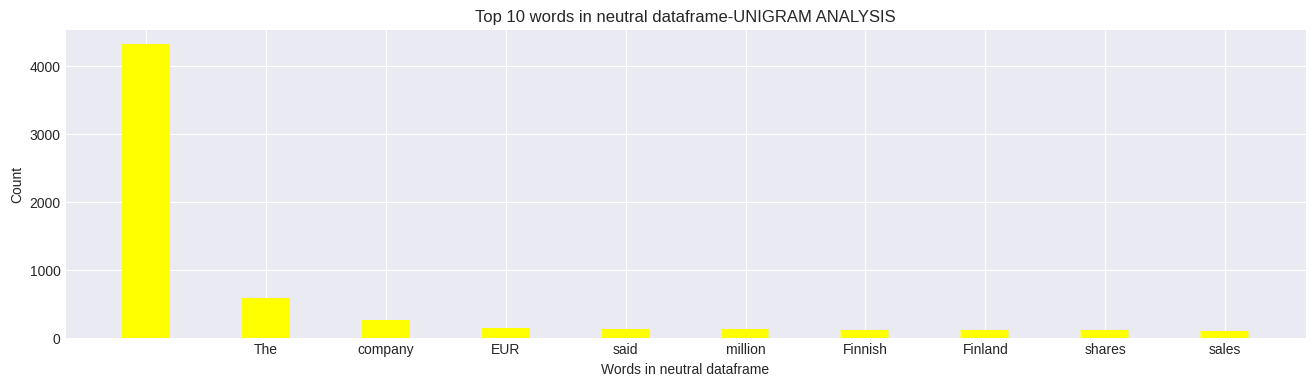

In [57]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

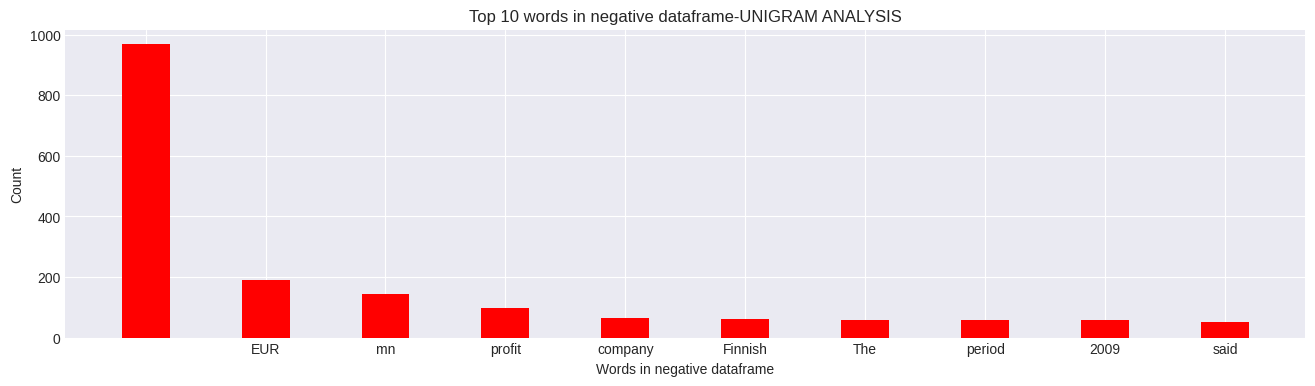

In [58]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

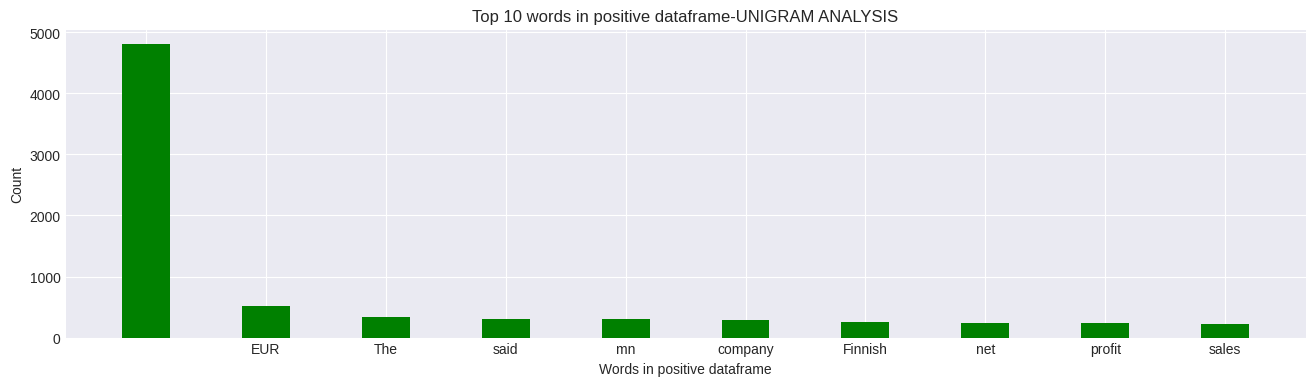

In [59]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

bi grams

In [60]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [61]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', 'Czech', 'Republic', 'autumn', 'Brno', '']
Sentence after removing stopwords: ['In', 'addition', 'Indian', 'market', '', 'new', 'plant', 'serve', 'Salcomp', 'customers', 'globally', '', 'company', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '131', 'mn', 'EUR', '87', 'mn', 'corresponding', 'period', '2007', 'representing', '77', '', 'net', 'sales', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'owns', '43', 'percent', 'Bergvik', 'earns', 'therefore', 'SEK', '15', 'bn', 'value', 'appreciation', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']

In [62]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['The', 'steelmaker', 'said', 'drop', 'profit', 'explained', 'continuing', 'economic', 'uncertainty', '', 'mixed', 'current', 'drought', 'bank', 'lending', '', 'resulting', 'decline', 'demand', 'products', 'customers', 'find', 'increasingly', 'difficult', 'fund', 'operations', '']
Sentence after removing stopwords: ['Belarus', 'OAO', 'Lidskoe', 'Pivo', 'brewery', '', 'based', 'Grodno', 'Region', '', 'reported', '11', '', 'decrease', 'output', '1045', 'million', 'decaliters', 'JanuaryMarch', '2010', '', 'representative', 'administration', 'company', 'told', '']
Sentence after removing stopwords: ['The', 'real', 'estate', 'company', 'posted', 'net', 'loss', '\x88', '', 'x201a', 'õ', '593', 'million', '\x88', '', 'x201a', 'õ', '021', 'per', 'share', 'compared', 'net', 'profit', '\x8

In [63]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['No', 'changes', 'regarding', 'Virala', 'Oy', 'Ab', 'ownership', 'shares', 'Tiimari', 'taken', 'place', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Czech', 'Republic', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Czech', 'Republic', '']
Sentence after removing stopwords: ['The', 'authorisation', 'force', 'end', 'next', 'Annual', 'General', 'Meeting', 'repeals', 'authorisation', 'acquire', 'shares', 'given', 'General', 'Meeting', 'held', 'April', '4', '', '2007', '']
Sentence after removing stopwords: ['Gearing', 

In [64]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [65]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [66]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [68]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [69]:
plt.figure(1,figsize=(16,4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<BarContainer object of 10 artists>

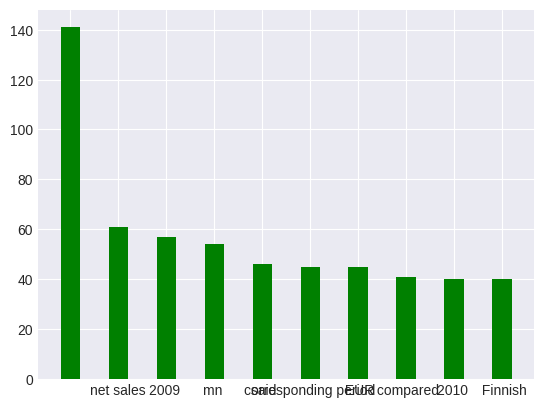

In [70]:
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

Text(0.5, 0, 'Words in positive dataframe')

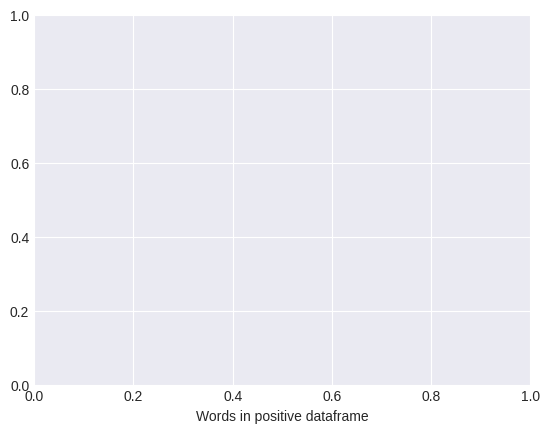

In [71]:
plt.xlabel("Words in positive dataframe")

Text(0, 0.5, 'Count')

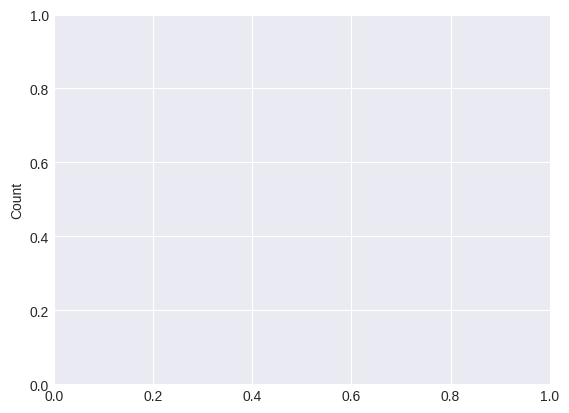

In [72]:
plt.ylabel("Count")

In [73]:
plt.savefig("positive-bigram.png")
plt.show()

<Figure size 640x480 with 0 Axes>

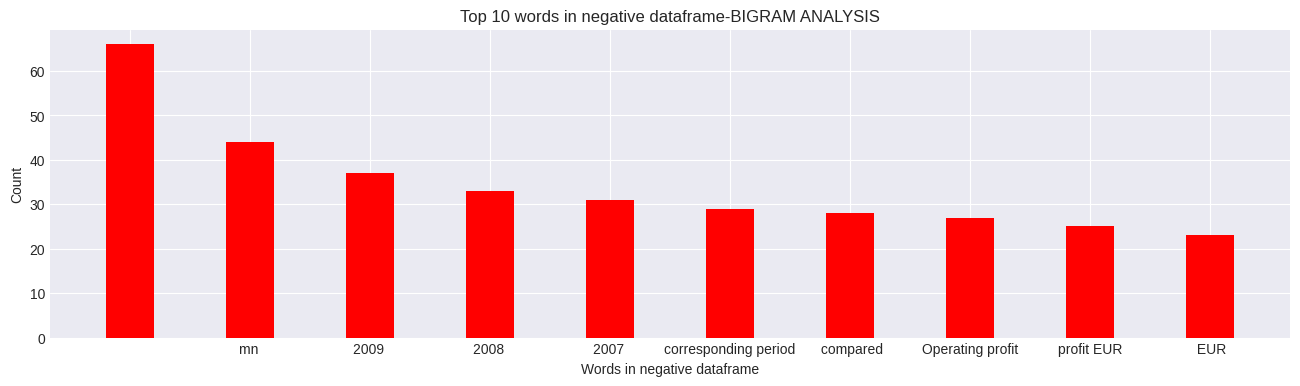

In [74]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

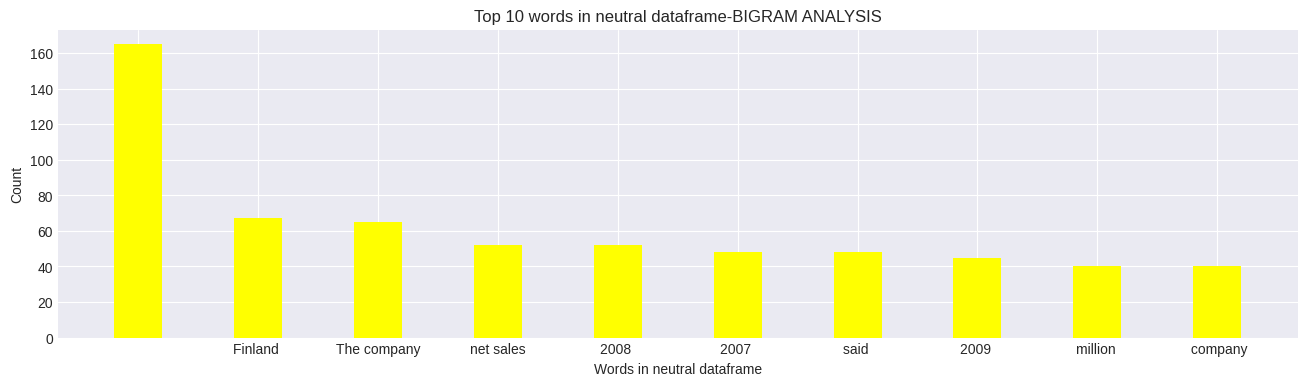

In [75]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

tri gram

In [76]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [77]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['', 'Several', 'growth', 'initiatives', 'chosen', 'geographic', 'areas', 'already', 'ongoing', '', '', 'continued', '', 'noting', 'Lindex', 'opened', 'first', 'store', 'Czech', 'Republic', 'autumn', 'Brno', '']
Sentence after removing stopwords: ['In', 'addition', 'Indian', 'market', '', 'new', 'plant', 'serve', 'Salcomp', 'customers', 'globally', '', 'company', 'said', '']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '131', 'mn', 'EUR', '87', 'mn', 'corresponding', 'period', '2007', 'representing', '77', '', 'net', 'sales', '']
Sentence after removing stopwords: ['Stora', 'Enso', 'owns', '43', 'percent', 'Bergvik', 'earns', 'therefore', 'SEK', '15', 'bn', 'value', 'appreciation', '']
Sentence after removing stopwords: ['The', 'company', 'moved', 'operating', 'profit', 'EUR10', '9', 'versus', 'operating', 'loss', 'EUR15', '3', 'It', 'also', 'turned', 'EPS', 'EUR0', '08', 'versus', 'loss', 'per', 'share', 'EUR0', '04', '']

In [78]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', '', 'rose', '367', 'points', '', '06', '', '', 'day', '', 'relative', 'price', 'change', '02', '', '']
Sentence after removing stopwords: ['The', 'steelmaker', 'said', 'drop', 'profit', 'explained', 'continuing', 'economic', 'uncertainty', '', 'mixed', 'current', 'drought', 'bank', 'lending', '', 'resulting', 'decline', 'demand', 'products', 'customers', 'find', 'increasingly', 'difficult', 'fund', 'operations', '']
Sentence after removing stopwords: ['Belarus', 'OAO', 'Lidskoe', 'Pivo', 'brewery', '', 'based', 'Grodno', 'Region', '', 'reported', '11', '', 'decrease', 'output', '1045', 'million', 'decaliters', 'JanuaryMarch', '2010', '', 'representative', 'administration', 'company', 'told', '']
Sentence after removing stopwords: ['The', 'real', 'estate', 'company', 'posted', 'net', 'loss', '\x88', '', 'x201a', 'õ', '593', 'million', '\x88', '', 'x201a', 'õ', '021', 'per', 'share', 'compared', 'net', 'profit', '\x8

In [79]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['No', 'changes', 'regarding', 'Virala', 'Oy', 'Ab', 'ownership', 'shares', 'Tiimari', 'taken', 'place', '']
Sentence after removing stopwords: ['ABN', 'Amro', 'Capital', 'agreed', 'sell', 'Helsinkibased', 'designer', 'homeware', 'producer', '', 'Iittala', 'Oyj', '', 'crosstown', 'consumer', 'products', 'group', 'Fiskars', 'Corp', '', 'EUR230', 'million', 'EUR235', 'million', '', '', '310', 'million', '', '316', 'million', '', '']
Sentence after removing stopwords: ['Pharmaceuticals', '', 'Czech', 'Republic', 'This', 'brandnew', 'market', 'analysis', 'gives', 'clear', 'overview', 'actual', 'situation', 'future', 'outlook', 'pharmaceutical', 'market', 'Czech', 'Republic', '']
Sentence after removing stopwords: ['The', 'authorisation', 'force', 'end', 'next', 'Annual', 'General', 'Meeting', 'repeals', 'authorisation', 'acquire', 'shares', 'given', 'General', 'Meeting', 'held', 'April', '4', '', '2007', '']
Sentence after removing stopwords: ['Gearing', 

In [80]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [81]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [82]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [83]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

Text(0.5, 1.0, 'Top 10 words in positive dataframe-TRIGRAM ANALYSIS')

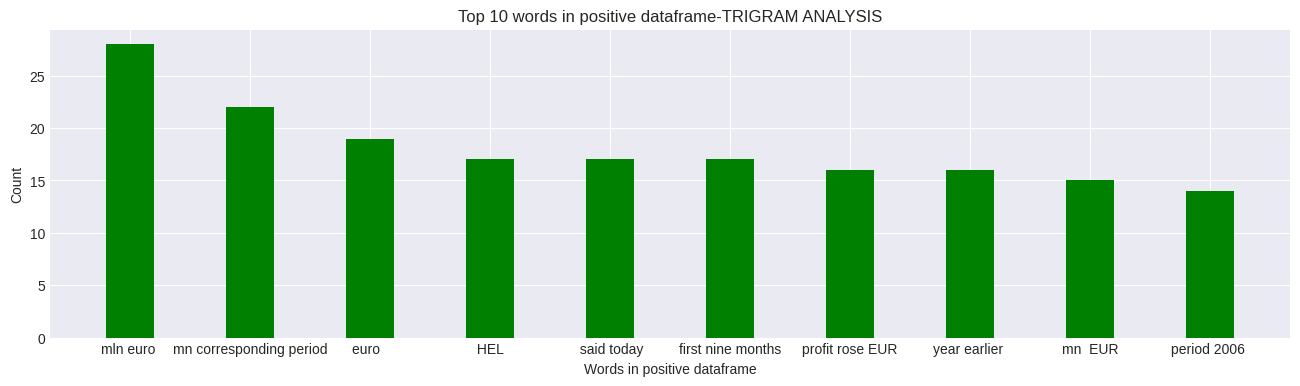

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

In [85]:
plt.savefig("positive-trigram.png")

<Figure size 640x480 with 0 Axes>

In [86]:
plt.show()

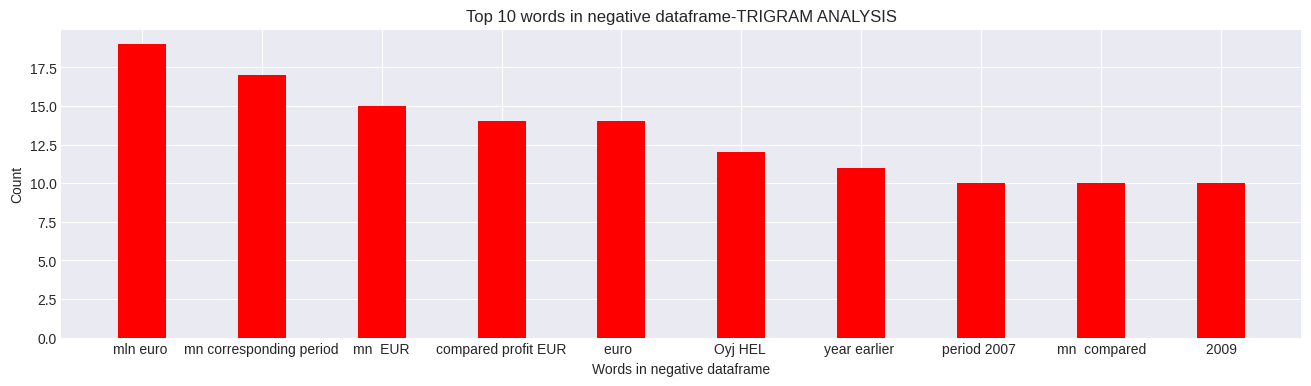

In [87]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

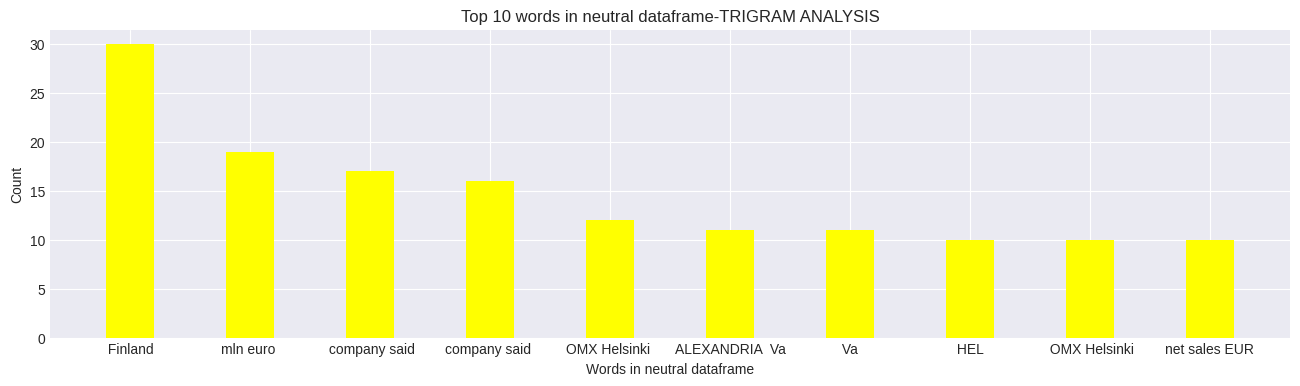

In [88]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

laplace smoothing technique for words not in corpus

In [96]:
from collections import defaultdict
class LaplaceSmoothing:
    def __init__(self, corpus):
        self.unigrams = defaultdict(int)
        self.bigrams = defaultdict(int)
        self.total_unigrams = 0
        self.vocab_size = 0

        self.train(corpus)

    def train(self, corpus):
        vocab = set()
        for sentence in corpus:
            tokens = sentence.split()
            vocab.update(tokens)
            for i in range(len(tokens)):
                self.unigrams[tokens[i]] += 1
                self.total_unigrams += 1
                if i > 0:
                    self.bigrams[(tokens[i-1], tokens[i])] += 1

        self.vocab_size = len(vocab)

    def bigram_prob(self, word1, word2):
        return (self.bigrams[(word1, word2)] + 1) / (self.unigrams[word1] + self.vocab_size)

corpus = ["cat sat on mat", "dog sat on mat"]
model = LaplaceSmoothing(corpus)

print(f"P(cat | the): {model.bigram_prob('the', 'cat'):.3f}")

P(cat | the): 0.200
